<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keeping-Conda-up-to-date-and-installing-new-packages" data-toc-modified-id="Keeping-Conda-up-to-date-and-installing-new-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keeping Conda up to date and installing new packages</a></span><ul class="toc-item"><li><span><a href="#Installing-a-new-package-in-your-virtual-environment" data-toc-modified-id="Installing-a-new-package-in-your-virtual-environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing a new package in your virtual environment</a></span></li><li><span><a href="#Updating-an-existing-package" data-toc-modified-id="Updating-an-existing-package-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Updating an existing package</a></span></li></ul></li><li><span><a href="#Building-regression-models" data-toc-modified-id="Building-regression-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building regression models</a></span></li></ul></div>

> All content here is under a Creative Commons Attribution [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and all source code is released under a [BSD-2 clause license](https://en.wikipedia.org/wiki/BSD_licenses).
>
>Please reuse, remix, revise, and [reshare this content](https://github.com/kgdunn/python-basic-notebooks) in any way, keeping this notice.

# Course overview

This is the fifth module of several (11, 12, 13, 14, 15 and 16), which refocuses the course material in the [prior 10  modules](https://github.com/kgdunn/python-basic-notebooks) in a slightly different way. It places more emphasis on

* dealing with data: importing, merging, filtering;
* calculations from the data;
* visualization of it.

In short: ***how to extract value from your data***.


# Module 15 Overview

In this module we will cover

* Fitting a linear regression model to the data
* Visualization of the linear regression model
* Accessing data from your data frame using `.loc` and `.iloc`
* Summarizing your data using an aggregation function.

**Requirements before starting**

* Have your Python installation working as you had for modules 11 to 14, including the Pandas library installed. 

* An extra requirement: install the `scikit-learn` and `seaborn` libraries. See instructions below.

## Keeping Conda up to date and installing new packages


Newer versions of packages are released frequently. You can update your packages (libraries), with this command::
```bash

    conda update -n base conda
    conda update --all
```

### Installing a new package in your virtual environment

You will come across people recommending different packages in Python for all sorts of interesting applications. For example, the library `seaborn` is often recommended for visualization. But you might not have it installed yet. 

This is how you can install the package called `seaborn` and `scikit-learn` packages in your virtual environment called ``myenv``:
```bash
    conda activate myenv    <--- change the last word in the command to the name of your actual environment
    conda install seaborn scikit-learn
```

Or in one line:
```bash
    conda install -n myenv seaborn scikit-learn
```


### Updating an existing package

Similar to the above, you can update a package to the latest version. Just change ``install`` to ``update`` instead.
Or in one line:
```bash
    conda update -n myenv seaborn scikit-learn
```

## Building regression models

In the [prior module](https://yint.org/pybasic14) you learned about setting the date and time when importing data, visualizing your data with box plots, histograms, line or time-series plots, and scatter plots. You applied these to your own data, and learned about the very powerful ``groupby`` function in Pandas.

In this module we will take these skills a step further, but first, we will learn about fitting regression models to some data. 

Start by importing Pandas, but also the tools to build regression models, from the `scikit-learn` library, which is imported as `sklearn`. You can read more about scikit-learn at their website: https://scikit-learn.org/stable/

In [6]:
import pandas as p
from sklearn.linear_model import LinearRegression

We will use a data set that is about the taste of cheddar cheese: https://openmv.net/info/cheddar-cheese

Read the data set in and set the column called "Case" to be the index:
```python
cheese = pd.read_csv("https://openmv.net/file/cheddar-cheese.csv").set_index("Case")
```

In the [prior module](https://yint.org/pybasic14) you were asked to 

1. calculate the correlation matrix of values and display that. Were you able to do so? 
2. Could you also visualize a scatter plot matrix of these values with the "kde" on the diagonal, squares for the markers and an alpha value of 0.8 for the points?
  
*Hint*: look at the documentation for `scatter_matrix` to see how to do this. You can look at the documentation inside Jupyter in several ways:
* ``help(scatter_matrix)``
* ``scatter_matrix?`` and then hit Ctrl-Enter.

,Acetic,H2S,Lactic,Taste
Acetic,1.000000,0.617956,0.604348,0.549529
H2S,0.617956,1.000000,0.643897,0.755763
Lactic,0.604348,0.643897,1.000000,0.703482
Taste,0.549529,0.755763,0.703482,1.000000


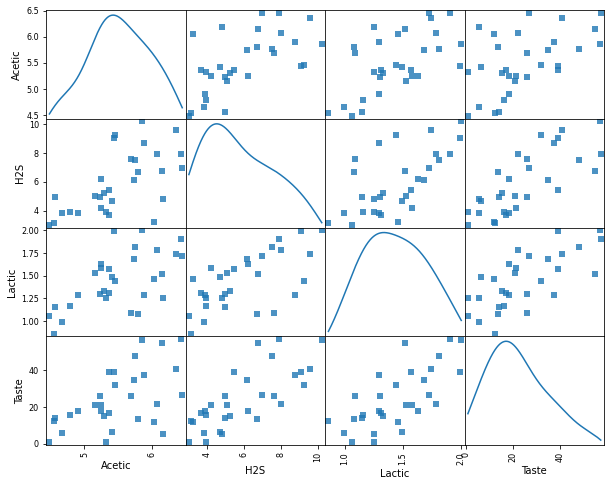

In [27]:
# Here is the solution code for the above:
# 
display(cheese.corr())
from pandas.plotting import scatter_matrix
scatter_matrix(cheese, alpha = 0.8, figsize=(10, 8), marker="s", diagonal = "kde");

Which column is the most correlated with the outcome variable called "Taste"?

Let us build a regression model using that measurement of "H2S", the concentration of hydrogen sulfide in the cheese, to predict its taste.

First, we set up an `instance` of the linear regression model:
```python
mymodel = LinearRegression()
type(mymodel)
```

The `mymodel` is an object. It is an object of a linear regression model, but it is empty at the moment. We will provide it some training data, to build the model, in this way:

```python
mymodel = LinearRegression()
mymodel.fit(X, y)
```

but we have to tell it what is `X` and what is `y`. So we have a small detour...

We need numeric values for `X` and `y`. We can get those as follows.

```python
print(cheese["H2S"])  # A Pandas Series (single column from the matrix of Cheese data)
print(cheese["H2S"].values)  # NumPy vector of values, 
print(cheese["H2S"].values.shape)  # Notice the vector is just a 1-D array of 30 values
print(cheese["H2S"].values.reshape(-1, 1)) # Force them into a single column
print(cheese["H2S"].values.reshape(-1, 1).shape)  # Now we have the right shape for scikit-learn
```

Scikit-learn requires the `X` data (the values used to predict `y`) to be a column vector or a matrix. Notice that a column vector is just a matrix with 1 column. This is because, you will see later, you can have 1 or more columns used to predict `y`. Therefore every input used to predict `y` must be in a column. Each row in the input matrix is one observation.

So this will work to build your regression model:

```python

# A single column in matrix X (capital X indicates one or more input columns)
X = cheese["H2S"].values.reshape(-1, 1) 
y = cheese["Taste"].values
mymodel = LinearRegression()
mymodel.fit(X, y)
```

If you run this code and see no error messages, the model has been built. But it is not that exciting. 

So what can you do with this model? Use 
```python
dir(mymodel)
```
to ask Python what can be done. Note that the ``dir(...)`` function works on any object and is something that you will use regularly.

There are several interesting *methods* that you see there which we will get to use.

* `coef_`
* `intercept_`
* `predict`
* `rank_`
* `score`

The first two, are as you might guess, the intercept of the model and the coefficient (slope).

```python
print(f"The intercept is {mymodel.intercept_} and the slope is = {mymodel.coef_}")
```

Now it is not so handy having all those decimal places. Python allows you to truncate them to the desired number:

```python
print(f"The intercept is {mymodel.intercept_:.5g} and the slope is = {mymodel.coef_}")
```

We have to be a bit more careful with the slope. It is an array (see the square brackets?): so we need to extract the first entry from that vector before displaying it:
```python
print(f"The intercept is {mymodel.intercept_:.5g} and the slope is = {mymodel.coef_[0]:.5g}")
```

Try this as well:
```python
print(f"The intercept is {mymodel.intercept_:.5f} and the slope is = {mymodel.coef_[0]:.5f}")
```
There is a subtle difference between the `f` and the `g` format specifiers.

In [64]:
X = cheese["H2S"].values.reshape(-1, 1) 
y = cheese["Taste"].values
mymodel = LinearRegression()
mymodel.fit(X, y)
print(f"The intercept is {mymodel.intercept_:.5f} and the slope is = {mymodel.coef_[0]:.5f}")

The intercept is -9.78843 and the slope is = 5.77641


mymodel.predict(X)



In [ ]:
# IGNORE this. Execute this cell to load the notebook's style sheet.
from IPython.core.display import HTML
css_file = './images/style.css'
HTML(open(css_file, "r").read())